# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [24]:
import requests
import re

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#pane')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [25]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [62]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [63]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


In [64]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>]

In [29]:
(table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text).strip()

'2021-06-30'

In [30]:
(table.find_all('td', attrs={'class':'text-center'})[0].text).strip()

'$253,607,549,372'

In [31]:
(table.find_all('td', attrs={'class':'text-center'})[1].text).strip()

'$27,149,143,847'

In [32]:
(table.find_all('td', attrs={'class':'text-center'})[2].text).strip()

'$2,169.40'

In [33]:
(table.find_all('td', attrs={'class':'text-center'})[3].text).strip()

'N/A'

In [34]:
(table.find_all('th', attrs={'class':'font-semibold text-center'})[1].text).strip()

'2021-06-29'

In [35]:
(table.find_all('td', attrs={'class':'text-center'})[4].text).strip()

'$243,040,539,437'

In [36]:
(table.find_all('td', attrs={'class':'text-center'})[5].text).strip()

'$30,629,329,806'

Finding row length.

In [65]:
row = table.find_all('th', attrs={'font-semibold text-center'})
row_length = len(row)
row_length

547

Do the scrapping process here (please change this markdown with your explanation)

In [66]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    #mengambil data Tanggal pada table
    tgl = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    #mengambil data volume pada table
        
    vol = (table.find_all('td', attrs={'class':'text-center'})[(i+(3*i))+1].text).strip()

    temp.append((tgl,vol))
temp

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

In [67]:
temp = temp[::-1]
temp

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218'),
 ('2020-01-11', '$10,273,370,788'),
 ('2020-01-12', '$9,737,605,323'),
 ('2020-01-13', '$8,488,793,478'),
 ('2020-01-14', '$8,019,794,567'),
 ('2020-01-15', '$18,970,204,899'),
 ('2020-01-16', '$17,862,385,532'),
 ('2020-01-17', '$14,605,493,159'),
 ('2020-01-18', '$15,915,322,020'),
 ('2020-01-19', '$15,808,136,411'),
 ('2020-01-20', '$14,003,433,869'),
 ('2020-01-21', '$10,983,216,126'),
 ('2020-01-22', '$8,267,420,453'),
 ('2020-01-23', '$8,809,189,829'),
 ('2020-01-24', '$9,017,537,604'),
 ('2020-01-25', '$11,043,498,595'),
 ('2020-01-26', '$8,673,816,085'),
 ('2020-01-27', '$10,518,901,915'),
 ('2020-01-28', '$12,435,457,693'),
 ('2020-

## Creating data frame & Data wrangling

Put the array into dataframe

In [68]:
import pandas as pd
#membuat dataframe dari temp
df = pd.DataFrame(temp, columns = ('tgl','vol'))
df.head()

,tgl,vol
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [69]:
df.dtypes
#merubah tipe kolom tgl menjadi format datetime64
df['tgl'] = df['tgl'].astype('datetime64')

#merubah karakter dalam kolom vol
#mengganti karakter dollar
df['vol'] = df['vol'].str.replace("$","")
#mengganti karakter koma
df['vol'] = df['vol'].str.replace(",","")
#mengganti tipe
df['vol'] = df['vol'].astype('float64')

df.head()

C:\Users\SEKRET~1\AppData\Local\Temp/ipykernel_30264/1976575024.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['vol'] = df['vol'].str.replace("$","")


,tgl,vol
0,2020-01-01,7.103187e+09
1,2020-01-02,6.623732e+09
2,2020-01-03,6.497298e+09
3,2020-01-04,9.655245e+09
4,2020-01-05,6.958394e+09


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<AxesSubplot:title={'center':'Grafik Penjualan Ethereum '}, xlabel='Tanggal', ylabel='Volume (100M)'>

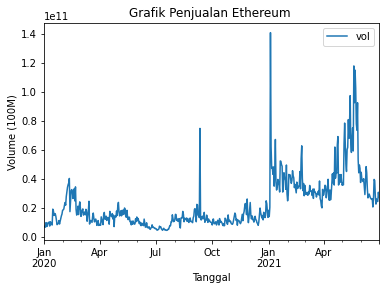

In [70]:
dplot = df.set_index('tgl')
dplot.plot(title='Grafik Penjualan Ethereum ',xlabel="Tanggal",ylabel="Volume (100M)",kind='line')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

1. Volume Penjualan Ethereum mengalami volatilitas;
2. Pada tahun 2020, Volume Penjualan cenderung stabil dalam range 0,1 - 0,4, dengan penjualan tertinggi pada angka 0,4 pada bulan Februari 2020 (dalam 100M Dollar);
3. Pada tahun 2021, Volume Penjualan meningkat drastis dalam range 0,1 - 1,4 dengan penjualan tertinggi pada angka 1,4, pada bulan Januari 2021 (dalam 100M Dollar);
4. Pada TW III 2021, Volume Penjualan mengalami penurunan dari 1,2 ke 0,3;
5. Dapat disimpulkan pada tahun 2020, Pembelian cenderung stabil, namun pada awal tahun 2021, pembelian meningkat, namun pada TW III mengalami penuruan.


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.